### Unsupervised learning rule

The BCM and Oja unsupervised learning rules are implemented in Nengo.

* Bienenstock, Cooper, and Munro (BCM) learning rule

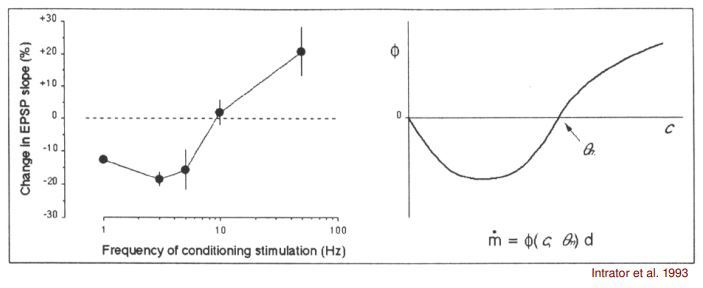

* Oja learning rule

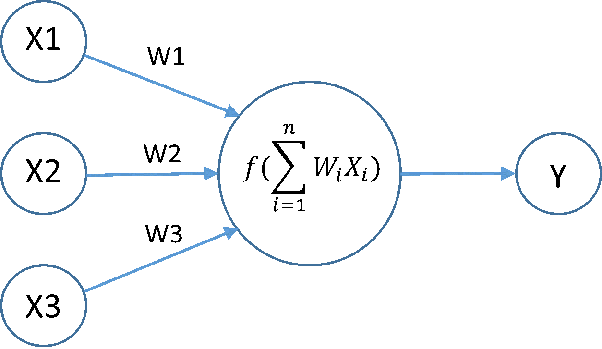

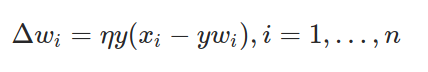

In [1]:
!pip install nengo

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import nengo

In [3]:
print(nengo.BCM.__doc__)

Bienenstock-Cooper-Munroe learning rule.

    Modifies connection weights as a function of the presynaptic activity
    and the difference between the postsynaptic activity and the average
    postsynaptic activity.

    Notes
    -----
    The BCM rule is dependent on pre and post neural activities,
    not decoded values, and so is not affected by changes in the
    size of pre and post ensembles. However, if you are decoding from
    the post ensemble, the BCM rule will have an increased effect on
    larger post ensembles because more connection weights are changing.
    In these cases, it may be advantageous to scale the learning rate
    on the BCM rule by ``1 / post.n_neurons``.

    Parameters
    ----------
    learning_rate : float, optional
        A scalar indicating the rate at which weights will be adjusted.
    pre_synapse : `.Synapse`, optional
        Synapse model used to filter the pre-synaptic activities.
    post_synapse : `.Synapse`, optional
        Synapse model

In [4]:
print(nengo.Oja.__doc__)

Oja learning rule.

    Modifies connection weights according to the Hebbian Oja rule, which
    augments typically Hebbian coactivity with a "forgetting" term that is
    proportional to the weight of the connection and the square of the
    postsynaptic activity.

    Notes
    -----
    The Oja rule is dependent on pre and post neural activities,
    not decoded values, and so is not affected by changes in the
    size of pre and post ensembles. However, if you are decoding from
    the post ensemble, the Oja rule will have an increased effect on
    larger post ensembles because more connection weights are changing.
    In these cases, it may be advantageous to scale the learning rate
    on the Oja rule by ``1 / post.n_neurons``.

    Parameters
    ----------
    learning_rate : float, optional
        A scalar indicating the rate at which weights will be adjusted.
    pre_synapse : `.Synapse`, optional
        Synapse model used to filter the pre-synaptic activities.
    post_sy

In [5]:
model = nengo.Network()
with model:
    sin = nengo.Node(lambda t: np.sin(t * 4))

    pre = nengo.Ensemble(100, dimensions=1)
    post = nengo.Ensemble(100, dimensions=1)

    nengo.Connection(sin, pre)
    conn = nengo.Connection(
        pre, post, solver=nengo.solvers.LstsqL2(weights=True)
    )

    pre_p = nengo.Probe(pre, synapse=0.01)
    post_p = nengo.Probe(post, synapse=0.01)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

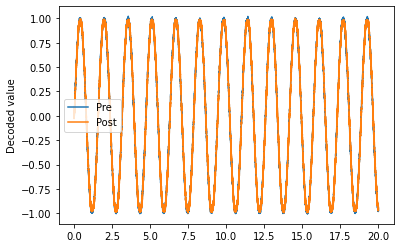

In [6]:
with nengo.Simulator(model) as sim:
    sim.run(20.0)

plt.figure()
plt.plot(sim.trange(), sim.data[pre_p], label="Pre")
plt.plot(sim.trange(), sim.data[post_p], label="Post")
plt.ylabel("Decoded value")
plt.legend(loc="best");

In [7]:
conn.learning_rule_type = nengo.BCM(learning_rate=5e-10)
with model:
    weights_p = nengo.Probe(conn, 'weights', synapse=0.01, sample_every=0.01)

In [8]:
with nengo.Simulator(model) as sim:
    sim.run(20.0)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

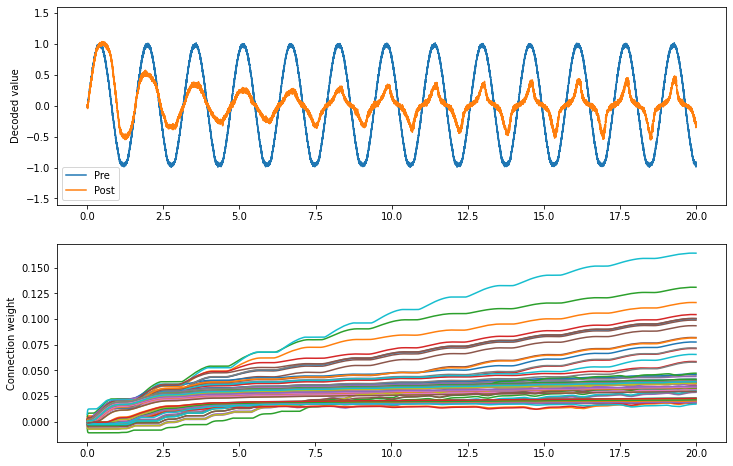

In [9]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(sim.trange(), sim.data[pre_p], label="Pre")
plt.plot(sim.trange(), sim.data[post_p], label="Post")
plt.ylabel("Decoded value")
plt.ylim(-1.6, 1.6)
plt.legend(loc="lower left")
plt.subplot(2, 1, 2)
# Find weight row with max variance
neuron = np.argmax(np.mean(np.var(sim.data[weights_p], axis=0), axis=1))
plt.plot(sim.trange(sample_every=0.01), sim.data[weights_p][..., neuron])
plt.ylabel("Connection weight");

In [10]:
conn.learning_rule_type = nengo.Oja(learning_rate=6e-8)

In [11]:
with nengo.Simulator(model) as sim:
    sim.run(20.0)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

Text(0, 0.5, 'Connection weight')

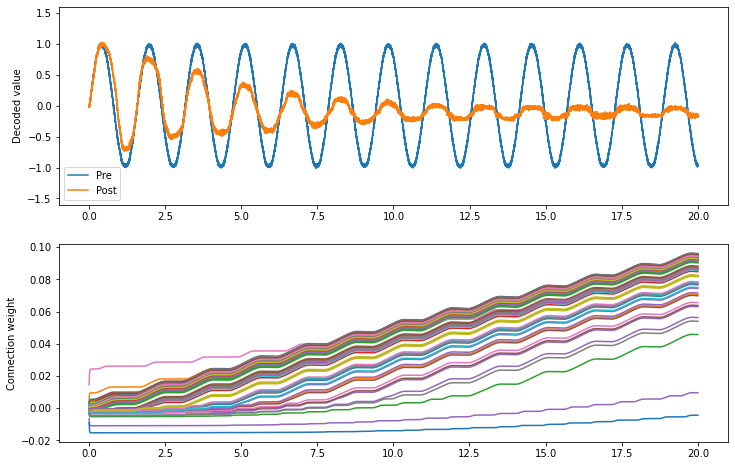

In [12]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(sim.trange(), sim.data[pre_p], label="Pre")
plt.plot(sim.trange(), sim.data[post_p], label="Post")
plt.ylabel("Decoded value")
plt.ylim(-1.6, 1.6)
plt.legend(loc="lower left")
plt.subplot(2, 1, 2)
# Find weight row with max variance
neuron = np.argmax(np.mean(np.var(sim.data[weights_p], axis=0), axis=1))
plt.plot(sim.trange(sample_every=0.01), sim.data[weights_p][..., neuron])
plt.ylabel("Connection weight")

### Unsupervised learning with Gym

In [13]:
!apt-get install -y python-numpy python-dev cmake zlib1g-dev libjpeg-dev xvfb \
    xorg-dev python-opengl libboost-all-dev libsdl2-dev swig

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libjpeg-dev is already the newest version (8c-2ubuntu8).
python-dev is already the newest version (2.7.15~rc1-1).
python-numpy is already the newest version (1:1.13.3-2ubuntu1).
zlib1g-dev is already the newest version (1:1.2.11.dfsg-0ubuntu2).
libboost-all-dev is already the newest version (1.65.1.0ubuntu1).
python-opengl is already the newest version (3.1.0+dfsg-1).
swig is already the newest version (3.0.12-1).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
xorg-dev is already the newest version (1:7.7+19ubuntu7.1).
libsdl2-dev is already the newest version (2.0.8+dfsg1-1ubuntu1.18.04.4).
xvfb is already the newest version (2:1.19.6-1ubuntu4.4).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [14]:
!pip install pyvirtualdisplay
!pip install piglet

In [15]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

In [16]:
!pip install gym

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import nengo
import gym
from nengo.synapses import Lowpass, SynapseParam

In [18]:
from base64 import b64encode
from glob import glob
from IPython.display import HTML
from IPython import display as ipy_display
from gym import logger as gym_logger
from gym.wrappers import Monitor

In [19]:
def show_video():
    mp4_list = glob('video/*.mp4')
    if mp4_list:
        mp4 = mp4_list[0]
        video = open(mp4, 'r+b').read()
        encoded = b64encode(video)
        ipy_display.display(HTML(data='''
            <video alt="gameplay" autoplay controls style="height: 400px;">
                <source src="data:video/mp4;base64,%s" type="video/mp4" />
            </video>
        ''' % (encoded.decode('ascii'))))
    else:
        print('No video found')

def wrap_env(env):
    env = Monitor(env, './video', force=True)
    return env

In [20]:
import gym

env = wrap_env(gym.make('CartPole-v0'))
print(env.action_space)
observation = env.reset()

for i in range(1000):
    env.render()
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    if done:
        break
        
env.close()
show_video()

Discrete(2)


In [21]:
# env = gym.make('MountainCarContinuous-v0').env
env = wrap_env(gym.make('CartPole-v0'))


class EnvironmentInterface(object):
    def __init__(self,env,stepSize = 5):
        self.env = env
        self.n_actions = env.action_space.n
        self.state_dim = env.observation_space.shape[0]
        self.t=0
        self.stepsize = stepSize
        self.output = np.zeros(self.n_actions)
        self.state = env.reset()
        self.reward= 0
        self.current_action = 0
        self.reward_arr = []
        self.totalReward = 0

    def take_action(self,action):
        self.state,self.reward,self.done,_=env.step(action)
        self.totalReward += self.reward
        if self.done:
            self.reward = -2
            self.totalReward += self.reward
            self.reward_arr.append(self.totalReward)
            self.state = env.reset()
            self.totalReward = 0

    def get_reward(self,t):
        return self.reward
    
    def sensor(self,t):
        return self.state

    
    def step(self,t,x):
#         env.render()
        if int(t*1000)%self.stepsize == 0:
            self.current_action = np.argmax(x)
            self.take_action(self.current_action)

In [22]:
model=nengo.Network()

tau = 0.01

fast_tau = 0
slow_tau = 0.01
envI=EnvironmentInterface(env)

state_dimensions=envI.state_dim
n_actions = envI.n_actions

In [23]:
with model:
    sensor = nengo.Node(envI.sensor)
    reward = nengo.Node(envI.get_reward)
    
    sensor_net = nengo.Ensemble(n_neurons=1000,dimensions=envI.state_dim,radius=10)
    
    nengo.Connection(sensor,sensor_net)
    
    action_net = nengo.Ensemble(n_neurons=1000,dimensions=envI.n_actions,radius=10)

    conn = nengo.Connection(
        sensor_net, action_net, function=lambda x:[0,0], solver=nengo.solvers.LstsqL2(weights=True)
    )
    conn.learning_rule_type = nengo.BCM(learning_rate=5e-10)
                                                   
    step_node = nengo.Node(envI.step,size_in=2)

    nengo.Connection(action_net,step_node)

In [24]:
with nengo.Simulator(model) as sim:
    sim.run(20.0)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

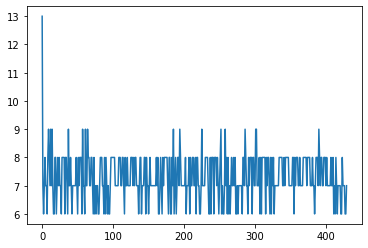

In [25]:
plt.plot(envI.reward_arr)